1.  Найти  данные  для  кластеризации. Данные  в  группе  не  должны 
повторяться.  Если  признаки  в  данных  имеют  очень сильно разные 
масштабы, то необходимо данные предварительно нормализовать.

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
wine = load_wine()
X = wine.data 

df = pd.DataFrame(X, columns=wine.feature_names)

print(df.head())

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов, которые будут удалены.")
    df = df.drop_duplicates()

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


print("Результат нормализации")
print(pd.DataFrame(X_scaled, columns=wine.feature_names).head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

Данные необходимо нормализовать, так как некоторые параметры имеют сильную разницу по модулю. Например, malic_acid меньше 2, а proline 1065.0. Это может нагативно сказаться на обучении.

2. Провести  кластеризацию  данных  с  помощью  алгоритма  k-means. 
Использовать  «правило  локтя»  и  коэффициент  силуэта  для  поиска 
оптимального количества кластеров.

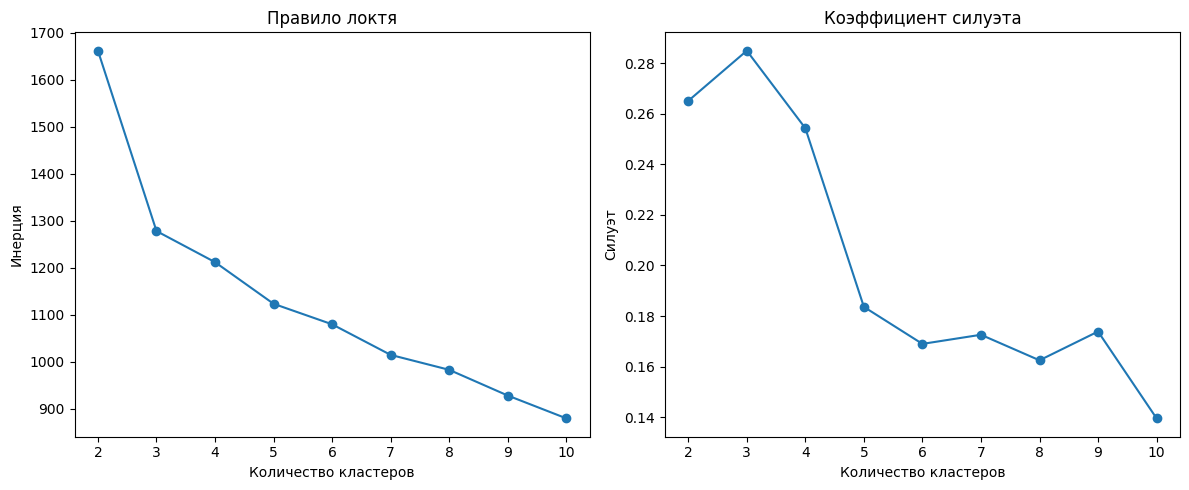

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Правило локтя
inertia = []
silhouette_scores = []

range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Правило локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')

plt.tight_layout()
plt.show()


Исходя из правила локтя можно предположить, что возможными подходящими числами для количества кластеров могут быть 2-5. Так как график для правила локтя не дает однозначного ответа на вопрос "Сколько кластеров брать?", необходимо обратиться к коэффициенту силуэта. По нему можно увидеть, что коэффициент силуэта достигает максимума при k=3.

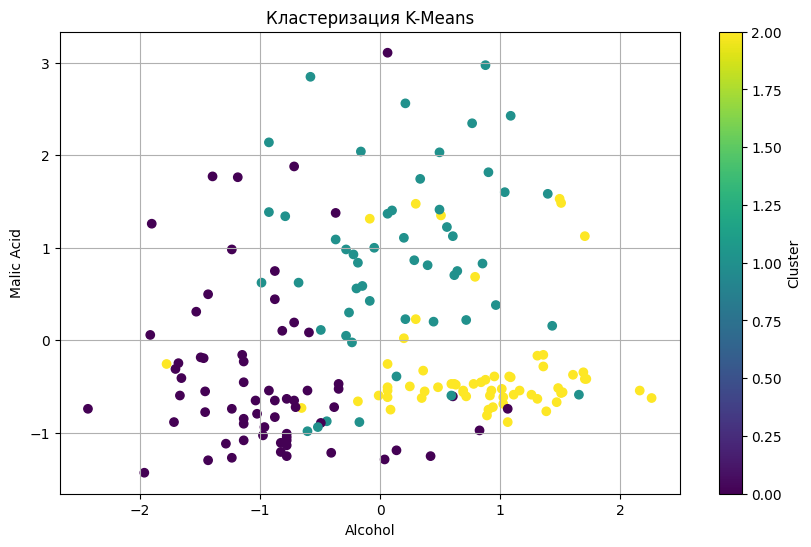

In [4]:
n_clusters =3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Получаем метки кластеров
labels = kmeans.labels_

# Создаем DataFrame для удобства
df = pd.DataFrame(X_scaled, columns=wine.feature_names)
df['Cluster'] = labels

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))

# Используем два первых признака для 2D визуализации
plt.scatter(df['alcohol'], df['malic_acid'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Кластеризация K-Means')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

3. Провести кластеризацию данных с помощью алгоритма иерархической 
кластеризации.

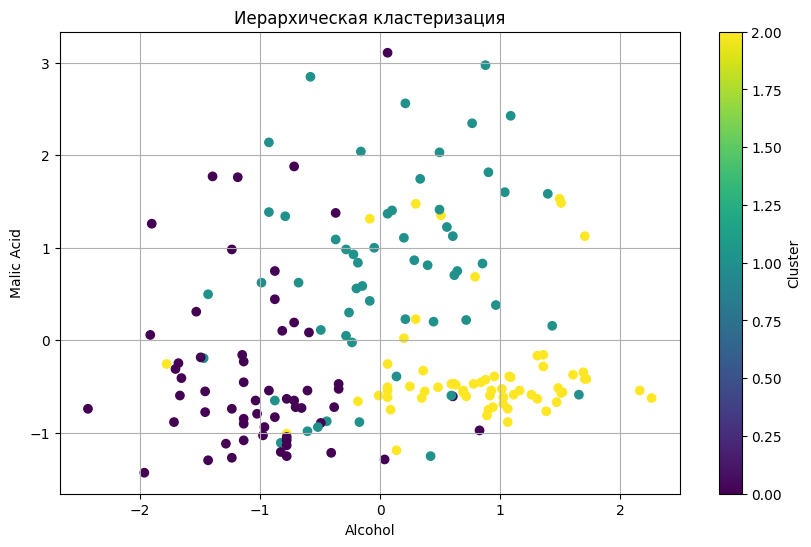

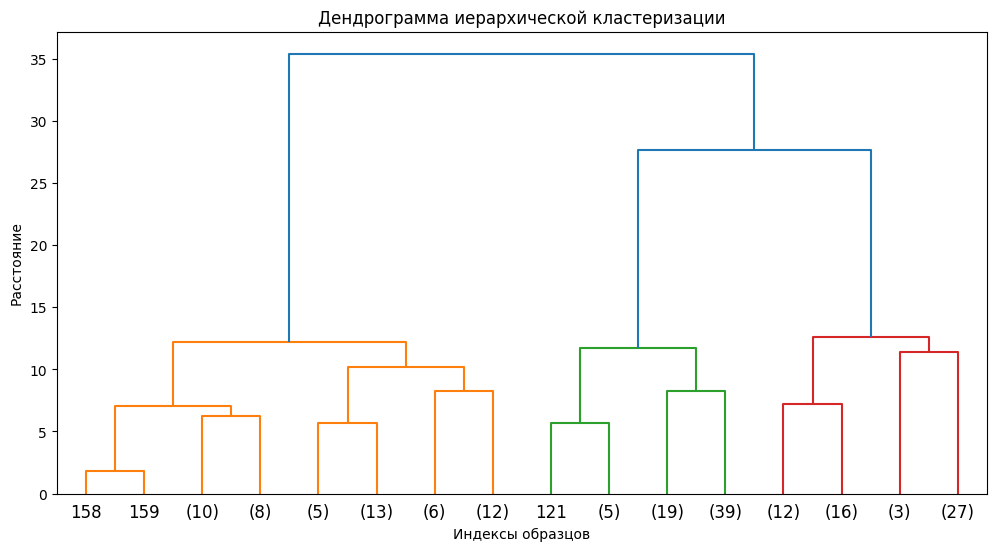

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters)
labels_hierarchical = hierarchical_cluster.fit_predict(X_scaled)

df_hierarchical = pd.DataFrame(X_scaled, columns=wine.feature_names)
df_hierarchical['Cluster'] = labels_hierarchical

plt.figure(figsize=(10, 6))
plt.scatter(df_hierarchical['alcohol'], df_hierarchical['malic_acid'], c=df_hierarchical['Cluster'], cmap='viridis', marker='o')
plt.title('Иерархическая кластеризация')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# дендрограмма
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы образцов')
plt.ylabel('Расстояние')
plt.show()


Ось абсцисс –  номер объекта. Ось ординат – расстояние между объектами в 
момент слияния.

4.  Провести кластеризацию данных с помощью алгоритма DBSCAN.

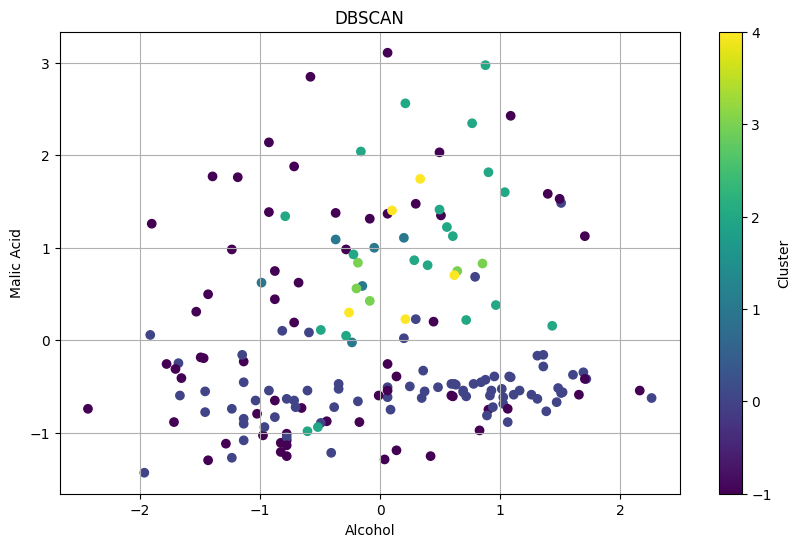

Количество кластеров: 5
Количество точек, помеченных как шум: 64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Проведение кластеризации DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)  # Параметры: eps - радиус поиска, min_samples - минимальное количество точек для формирования кластера
labels_dbscan = dbscan.fit_predict(X_scaled)

df_dbscan = pd.DataFrame(X_scaled, columns=wine.feature_names)
df_dbscan['Cluster'] = labels_dbscan

plt.figure(figsize=(10, 6))

plt.scatter(df_dbscan['alcohol'], df_dbscan['malic_acid'], c=df_dbscan['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


unique_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
noise_points = list(labels_dbscan).count(-1)

print(f"Количество кластеров: {unique_clusters}")
print(f"Количество точек, помеченных как шум: {noise_points}")



DBSCAN определил при эти параметрах 5 кластеров (eps=2, min_samples=3; eps - радиус поиска, min_samples - минимальное количество точек для формирования кластера). Что примечательно, для выбора этих параметров пришлось опытным путем рассмотреть разные варианты. Этот оказался оптимальным.

5. Визуализировать  кластеризованные  данные  с  помощью  t-SNE или 
UMAP, если  необходимо.  Если  данные  трехмерные,  то  можно 
использовать трехмерный точечный график.

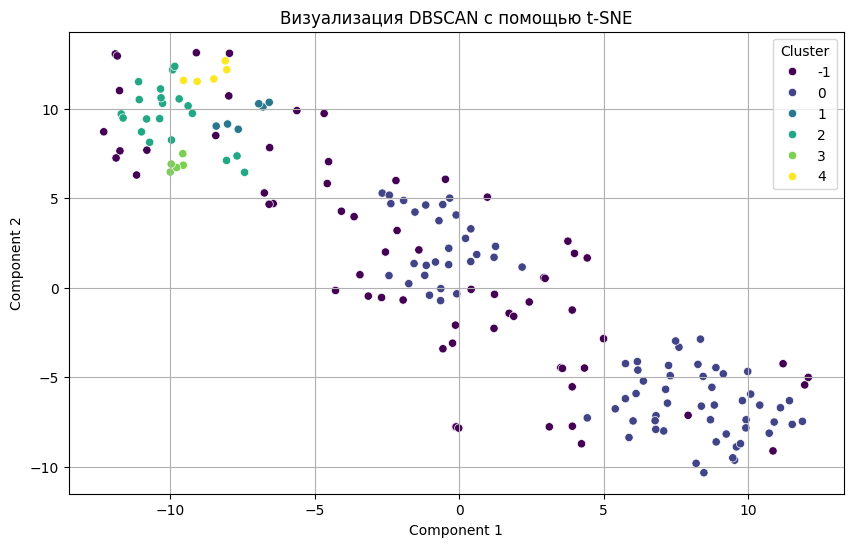

In [47]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Cluster'] = labels_dbscan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', palette='viridis', data=df_tsne, legend='full', marker='o')
plt.title('Визуализация DBSCAN с помощью t-SNE')
plt.grid()
plt.show()


c:\Users\Ева\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Ева\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


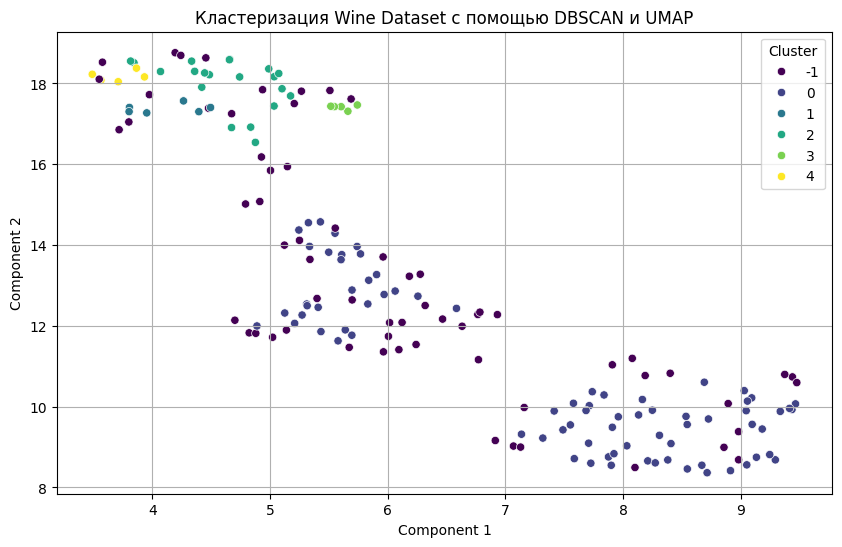

In [48]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

df_umap = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
df_umap['Cluster'] = labels_dbscan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', palette='viridis', data=df_umap, legend='full', marker='o')
plt.title('Кластеризация Wine Dataset с помощью DBSCAN и UMAP')
plt.grid()
plt.show()


Алгоритм DBSCAN с текущими параметрами не смог эффективно кластеризовать данные Wine Dataset, и большая часть точек была помечена как шум. Следует экспериментировать с параметрами или использовать другие алгоритмы кластеризации, такие как K-means или иерархическая кластеризация, которые ранее дали более ясные результаты.